In [1]:
from intercode import AutoencoderLinearDecoder, train_autoencoder, add_annotations
import torch
import scanpy as sc
import numpy as np

In [1]:
import slalom as sl

In [2]:
# preprocessed subset of Macosko15 retina dataset (log transformed, highly variable genes) 
# with reactome annotations in adata.varm['I']
# download dataset - https://drive.google.com/open?id=1LToCFkHytmryebra2cRVVBcKTKvlTkCI
adata = sc.read('mouse_retina_sbs.h5ad')

In [3]:
add_annotations(adata, files=['c2.cp.reactome.v4.0.symbols.gmt', 'astrocytes.csv'], min_genes=13)

In [4]:
# remove unannotated genes, center 
select_genes = adata.varm['I'].sum(1)>0
adata._inplace_subset_var(select_genes)
adata.X-=adata.X.mean(0)

In [4]:
LR = 0.001
BATCH_SIZE = 62
N_EPOCHS = 40

# regularization hyperparameters
# lambda0 - page 19 of presentation
# lambdas 1-3 - last term on page 20

LAMBDA0 = 0.1

LAMBDA1 = 0.95*LR
LAMBDA3 = 0.55*LR

In [5]:
autoencoder = AutoencoderLinearDecoder(adata.n_vars, n_ann=len(adata.uns['terms']))
# n_vars - number of genes in the dataset
# n_ann - number of annotated terms, corresponding l1 regularization hyperparameter - lambda1
# n_sparse - number of sparse terms, corresponding l1 regularization hyperparameter - lambda2
# n_dense - number of dense terms

In [6]:
train_autoencoder(adata, autoencoder, LR, BATCH_SIZE, N_EPOCHS,
                  l2_reg_lambda0=LAMBDA0, lambda1=LAMBDA1, lambda3=LAMBDA3)

Epoch: 0 | batch train loss: 433.7832
Epoch: 0 | batch train loss: 153.6513
Epoch: 0 | batch train loss: 158.4545
Epoch: 0 -- total train loss:  149.6219=143.7485+5.8734
Number of deactivated terms: 0
Share of deactivated genes: 0.9655
Epoch: 1 | batch train loss: 145.0830
Epoch: 1 | batch train loss: 145.0939
Epoch: 1 | batch train loss: 147.6109
Epoch: 1 -- total train loss:  134.1120=126.3002+7.8118
Number of deactivated terms: 0
Share of deactivated genes: 0.9856
Epoch: 2 | batch train loss: 146.7173
Epoch: 2 | batch train loss: 131.1062
Epoch: 2 | batch train loss: 127.6755
Epoch: 2 -- total train loss:  124.2372=116.3063+7.9309
Number of deactivated terms: 2
Share of deactivated genes: 0.9921
Epoch: 3 | batch train loss: 130.9362
Epoch: 3 | batch train loss: 117.3803
Epoch: 3 | batch train loss: 122.7075
Epoch: 3 -- total train loss:  118.2114=110.7418+7.4696
Number of deactivated terms: 6
Share of deactivated genes: 0.9942
Epoch: 4 | batch train loss: 117.7595
Epoch: 4 | batch t

Epoch: 34 | batch train loss: 115.8861
Epoch: 34 -- total train loss:  100.8884=96.7935+4.0949
Number of deactivated terms: 22
Share of deactivated genes: 0.9992
Epoch: 35 | batch train loss: 107.3890
Epoch: 35 | batch train loss: 113.2382
Epoch: 35 | batch train loss: 99.7632
Epoch: 35 -- total train loss:  100.7812=96.7077+4.0735
Number of deactivated terms: 22
Share of deactivated genes: 0.9991
Epoch: 36 | batch train loss: 119.9834
Epoch: 36 | batch train loss: 119.7303
Epoch: 36 | batch train loss: 110.8945
Epoch: 36 -- total train loss:  100.7663=96.7098+4.0565
Number of deactivated terms: 22
Share of deactivated genes: 0.9988
Epoch: 37 | batch train loss: 113.5636
Epoch: 37 | batch train loss: 101.6757
Epoch: 37 | batch train loss: 109.7687
Epoch: 37 -- total train loss:  100.6657=96.6008+4.0648
Number of deactivated terms: 22
Share of deactivated genes: 1.0003
Epoch: 38 | batch train loss: 109.3760
Epoch: 38 | batch train loss: 115.8984
Epoch: 38 | batch train loss: 102.2515
Ep

In [8]:
autoencoder.decoder.weight_dict['annotated'].data.norm(p=2, dim=0)

tensor([0.0000, 1.0106, 1.0441, 1.1266, 1.3732, 1.2215, 1.2104, 0.0000, 1.3718,
        1.0658, 0.0000, 1.5315, 0.8046, 1.2182, 0.9112, 0.7685, 0.0000, 1.2352,
        0.8853, 0.0000, 0.9378, 0.9033, 1.0056, 1.4299, 1.2373, 0.9203, 1.1722,
        1.2416, 0.5706, 0.9425, 1.2654, 1.2272, 0.8541, 1.3443, 1.0898, 1.1332,
        0.0000, 1.3072, 1.4358, 1.2922, 1.1011, 1.1267, 0.0000, 1.2664, 0.0000,
        0.4783, 1.3792, 1.4022, 1.5257, 1.5146, 0.9052, 1.0237, 0.7372, 1.3848,
        1.2238, 0.7208, 1.1276, 1.2432, 1.4071, 0.0000, 0.0000, 0.8306, 1.1138,
        1.0384, 1.5651, 0.0000, 0.9311, 1.0272, 1.4683, 1.2365, 1.1552, 1.0744,
        1.0243, 1.0003, 1.0131, 1.3111, 0.0000, 0.0000, 0.5246, 0.7508, 1.0471,
        0.8101, 1.2769, 1.1857, 0.0000, 1.0914, 0.7861, 1.4337, 0.7488, 1.0696,
        1.2625, 1.2621, 0.7740, 1.3536, 1.3921, 1.0605, 1.0157, 1.2792, 1.2546,
        1.5327, 1.2586, 0.0000, 1.2105, 1.2279, 1.0311, 0.9944, 1.2696, 1.4147,
        0.9516, 0.0000, 0.0000, 1.3236, 

In [9]:
select_terms = lambda t1, t2: np.where(np.logical_or(adata.uns['terms']==t1, adata.uns['terms']==t2))[0]

In [10]:
terms = select_terms('REGULATION_OF_INSULIN_SECRETIO', 'ASTROCYTES')

In [11]:
W = autoencoder.decoder.weight_dict['annotated'].data.numpy()
(np.abs(W[:, terms])>0).sum(0)

array([19, 82])

In [13]:
autoencoder.decoder.weight_dict['annotated'].data.norm(p=2, dim=0)[terms]

tensor([1.5651, 1.7423])

In [14]:
adata.varm['I'][:, terms].sum(0)

array([14, 70])

In [15]:
encoded, decoded = autoencoder(torch.from_numpy(adata.X))
vars_latent = encoded[:, terms].data.numpy()

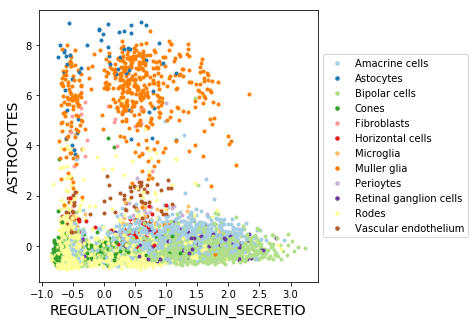

In [16]:
fg = sl.plotFactors(terms=['REGULATION_OF_INSULIN_SECRETIO', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)